# Chapter 11. The Lambert Problem
## Action by Juanita A. Agudelo-Quiceno, University of Antioquia

In this notebook we will present theory from the Lambert Problem related to mechanical orbits and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

> Prussing, J. E., & Conway, B. A. (1993). Orbital Mechanics. Oxford university press.

 ## Section 11.1: Introduction

The Lamber's problem tries to find an orbit from two positions and time of flight that separates them, this is a fundamental problem in astrodynamics. If we wanted a spacecraft to travel from one point in the space to another target point, for example, a planet or a space station, We would have to calculate the orbit in which the spacecraft has to move to reach its goal and the time it takes to get from one point to another. The spacecraft could intercept the target, that is, find a point where both bodies meet, without the need for the speeds of the bodies to be equal. Or we can make the spacecraft and the target meet at the same point at the same speed.





links that help me: 
- https://www.spacecraftresearch.com/generalized-orbit-rendezvous
- https://en.wikipedia.org/wiki/Space_rendezvous
- https://www.youtube.com/watch?v=ULRXJsiFMjo
- https://mappingignorance.org/2021/03/24/homa-a-space-orbit-simulator/


In [9]:
import rebound as rb
import celluloid as cell
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML

In [10]:
sim = rb.Simulation()
sim.units = ["km","kg","s"]
sim.add(m=5.9e24)
sim.add(m=0, a=6.7, e=6.13e-3)

In [11]:
r_soyuz = sim.particles[1].xyz
v_soyuz = sim.particles[1].vxyz

delta_v = 20
v_soyuz[0], v_soyuz[1] = v_soyuz[0] + delta_v, v_soyuz[1] + delta_v

sim.add(m=0, x=r_soyuz[0], y=r_soyuz[1], z=r_soyuz[2], vx=v_soyuz[0], vy=v_soyuz[1], vz=v_soyuz[2])

In [12]:
sim.status()


---------------------------------
REBOUND version:     	3.23.5
REBOUND built on:    	Mar  2 2023 13:22:06
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f3633271fc0, m=5.9e+24 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f36332705c0, m=0.0 x=6.6589290000000005 y=0.0 z=0.0 vx=0.0 vy=243.91952579199227 vz=0.0>
<rebound.particle.Particle object at 0x7f3633271fc0, m=0.0 x=6.6589290000000005 y=0.0 z=0.0 vx=20.0 vy=263.91952579199227 vz=0.0>
---------------------------------


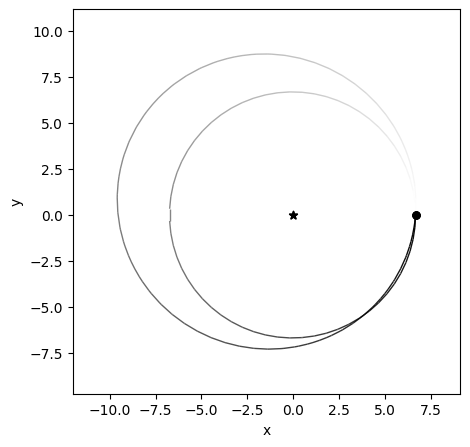

In [13]:
rb.OrbitPlot(sim)

In [18]:
sim.integrator = "whfast"
sim.integrate(-10*60)

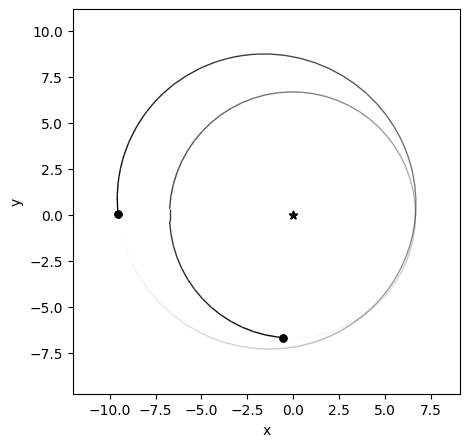

In [19]:
rb.OrbitPlot(sim)

In [ ]:
"""
sim.integrator = "whfast"

steps = np.linspace(2, 22, 20)
r_iss = np.zeros((20, 3))
r_soyuz = np.zeros((20, 3))
r_earth = np.zeros((20, 3))

plt.ioff()
fig, ax = plt.subplots()
camera = cell.Camera(fig)
for i, step in enumerate(steps):
    sim.integrate(-step*60)
    r_earth[i] = sim.particles[0].xyz
    r_iss[i] = sim.particles[1].xyz
    r_soyuz[i] = sim.particles[2].xyz

    ax.plot(r_earth[0], r_earth[1], '*', color='yellow')
    ax.plot(r_iss[0], r_iss[1], '.', color='r')
    ax.plot(r_soyuz[0], r_soyuz[1], '.', color='b')

    camera.snap()

plt.close()
plt.ion();
"""

In [ ]:
#anim = camera.animate(interval=20)


In [ ]:
#HTML(anim.to_html5_video())

buscar: MC-CuadernoClase-UnidadesCanonicas.ipynb
MC-CuadernoClase-SolucionEcuacionKepler.ipynb
MC-CuadernoClase-AnomaliasConicas.ipynb
MC-CuadernoClase-NcuerposAnimado.ipynb
https://es.wikipedia.org/wiki/Soyuz_TMA-14
https://es.wikipedia.org/wiki/Anousheh_Ansari
https://rebound.readthedocs.io/en/latest/integrators/

 ## Section 11.2: Transer Orbits Between Specified Points 

 ## Section 11.3: Lambert's Theorem 

 ## Section 11.4: Properties of the solutions to Lambert's Equation